# Advanced Programming for Data Science
*Code proposition done by:*
```
Farouq El-Abbass
Moritz Häckel
Dominik Trut
Moritz Güttersberger
```

Our project consisted of creating a module for studying the energy production and consumption per country, and as well the produced CO2 for each energy source.

We are going to start by *importing* the libraries we have used

In [5]:
import requests
import pandas as pd
import os
import plotly_express as px
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import statsmodels.api as sm
from pmdarima import auto_arima
import warnings
style.use("ggplot")
warnings.filterwarnings("ignore")

In [6]:
import sys
sys.path.insert(1, './Code')
from energy import Energy

### Our proposition for the class is as follows:

The class can be loaded through this magic flake command:

In [4]:
# %load "./Code/energy.py"

Let's start by initializing the object and the data

In [7]:
demo = Energy()

In [8]:
demo.read_data(drop_continents=True)

,country,iso_code,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,biofuel_emission,coal_emission,gas_emission,hyrdo_emission,nuclear_emission,oil_emission,solar_emission,wind_emission,emissions,total_consumption
timestamp,,,,,,,,,,,,,,,,,,,,,
1970,Afghanistan,AFG,1970,20.588,0.228,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1971,Afghanistan,AFG,1971,-17.683,-0.236,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1972,Afghanistan,AFG,1972,-47.407,-0.521,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1973,Afghanistan,AFG,1973,64.789,0.374,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1974,Afghanistan,AFG,1974,-1.709,-0.016,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,Zimbabwe,ZWE,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,185600.0,4312000.0,0.0,444600.0,0.0,0.0,424.0,0.0,4942624.0,0.0
2016,Zimbabwe,ZWE,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,213150.0,3715000.0,0.0,265950.0,0.0,0.0,477.0,0.0,4194577.0,0.0
2017,Zimbabwe,ZWE,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,218950.0,3219000.0,0.0,353610.0,0.0,0.0,583.0,0.0,3792143.0,0.0


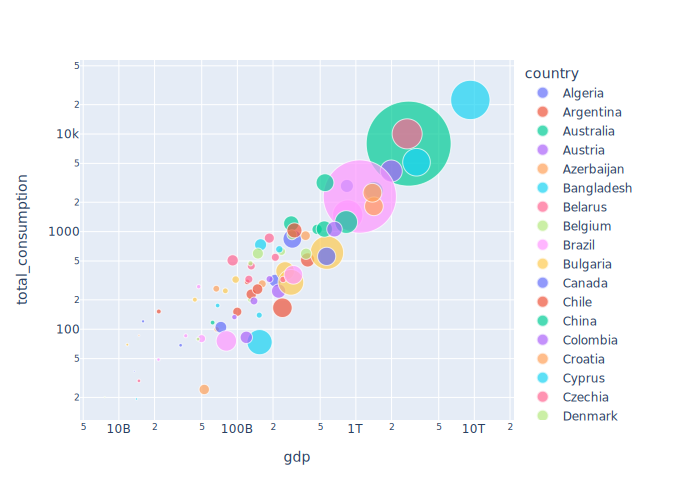

In [10]:
demo.gapminder(1990)

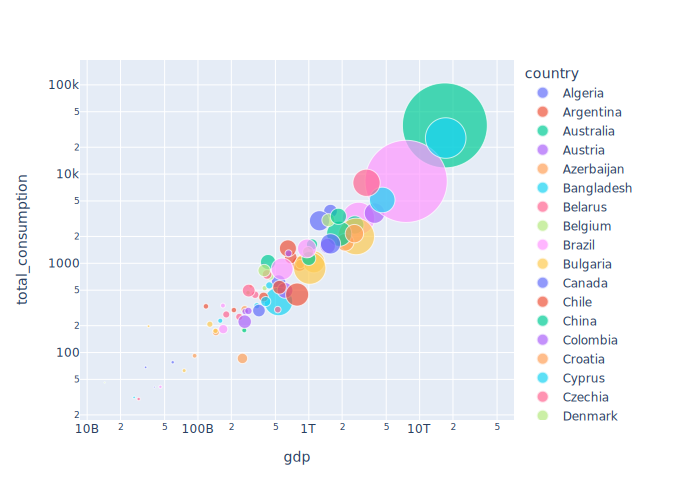

In [11]:
demo.gapminder(2016)

When analyzing the gapminder plot from 1990 to that of 2016, two intersting things meet the eye. The first is the general shift of all countries, towards a higher GDP and an increase in total consumption. The second aspect is that China has caught up to, and even surpassed the USA in terms of consumption. Also India has significantly increased its GPD and consumption, along with a rising numbers in population.

<AxesSubplot:xlabel='year'>

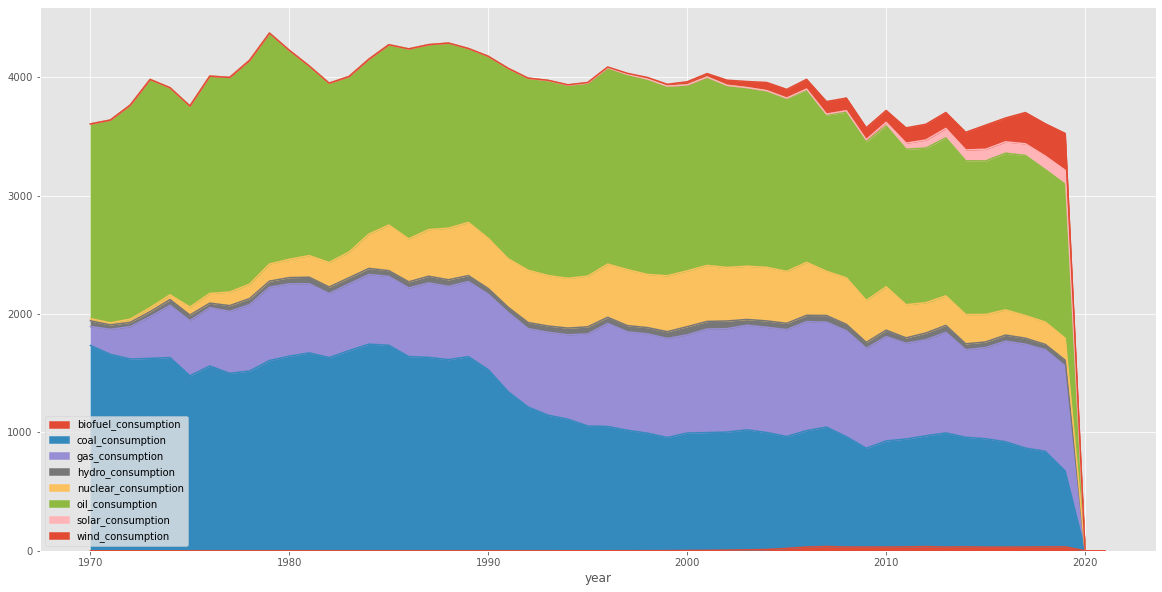

In [12]:
#Use your methods to analyse the evolution of each country's energy mix. Describe briefly what the evolution of the mix is, both totally and relatively.
demo.consumption_area_plot('Germany', False)

<AxesSubplot:xlabel='year'>

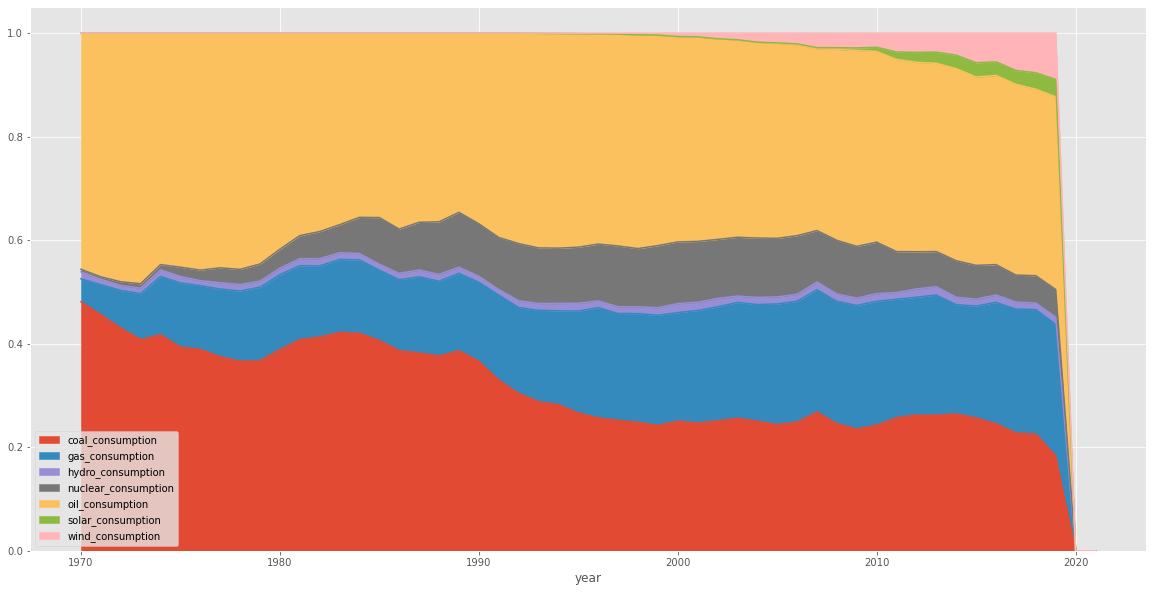

In [13]:
demo.consumption_area_plot('Germany', True)

<AxesSubplot:xlabel='year'>

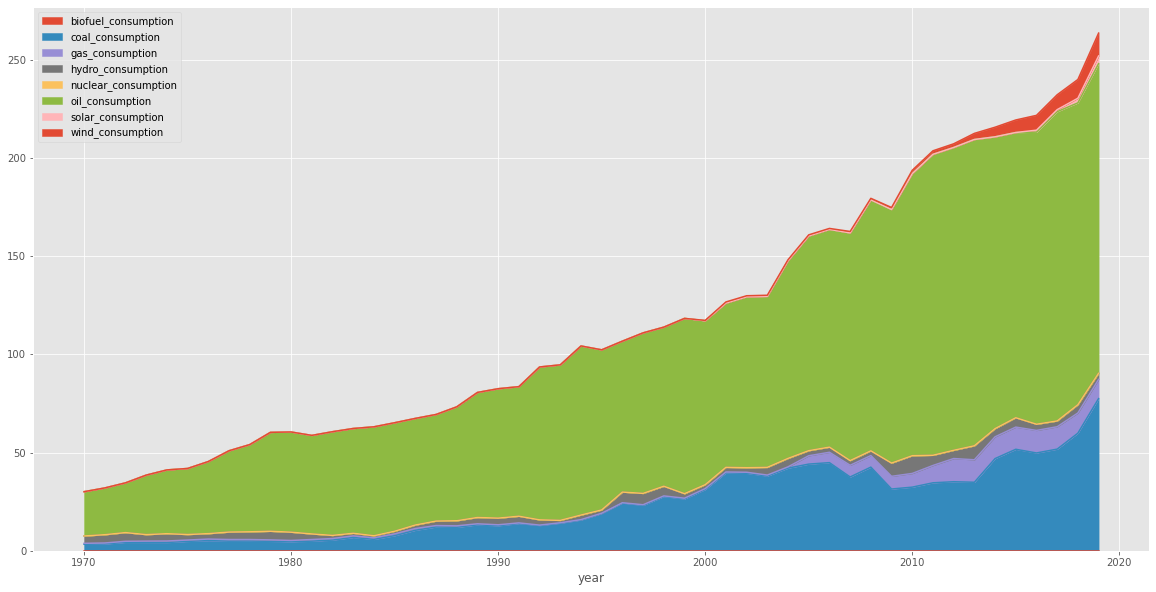

In [14]:
demo.consumption_area_plot('Morocco', False)

<AxesSubplot:xlabel='year'>

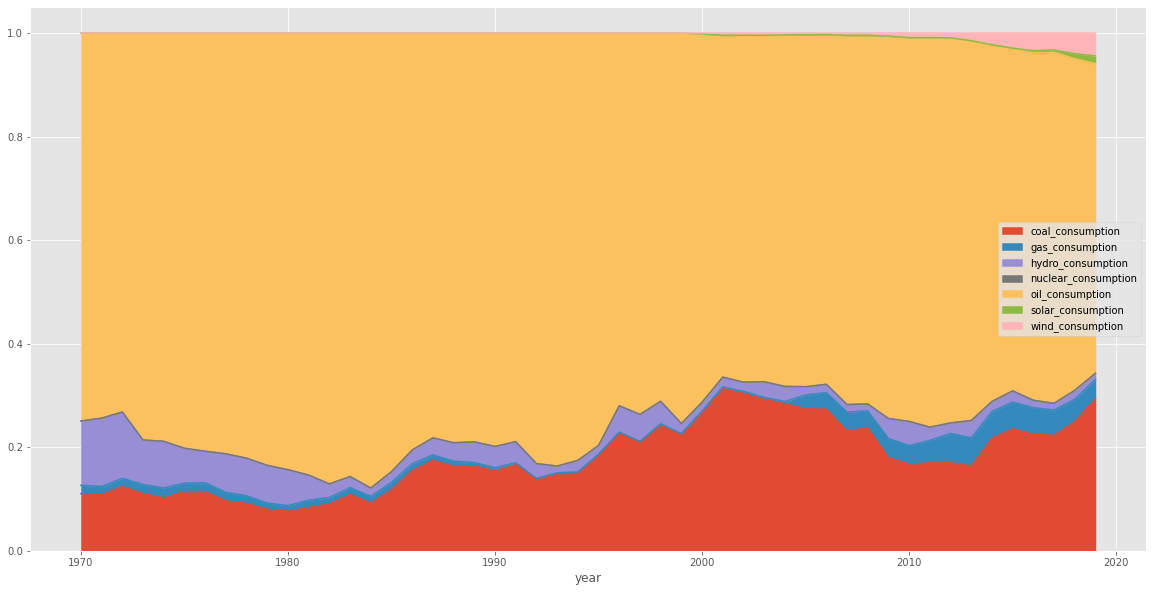

In [15]:
demo.consumption_area_plot('Morocco', True)

<AxesSubplot:xlabel='year'>

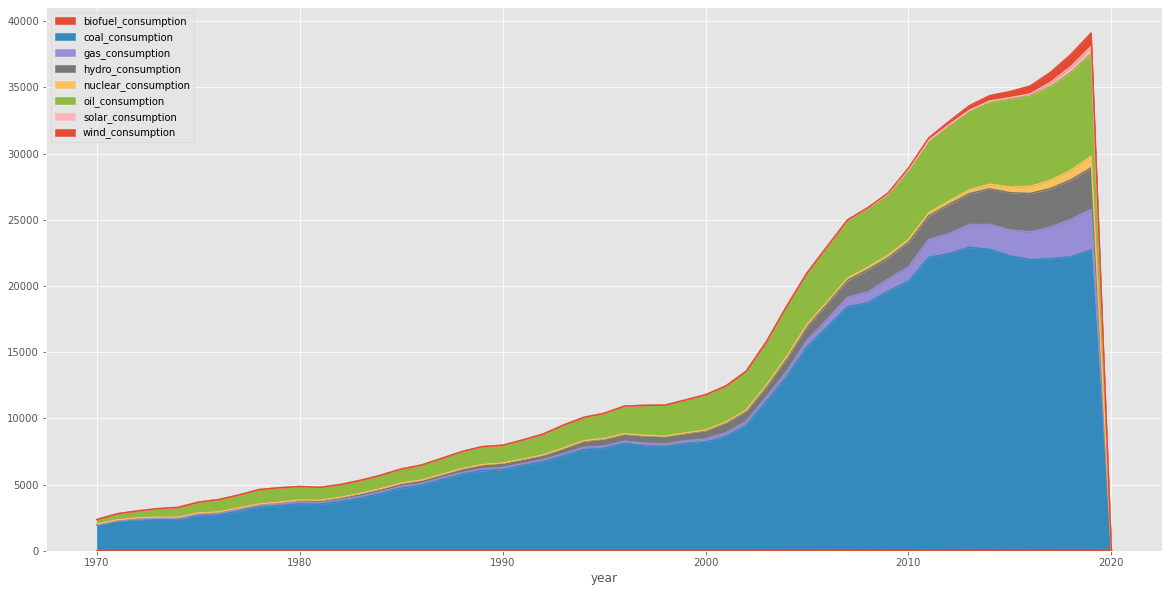

In [16]:
demo.consumption_area_plot('China', False)

<AxesSubplot:xlabel='year'>

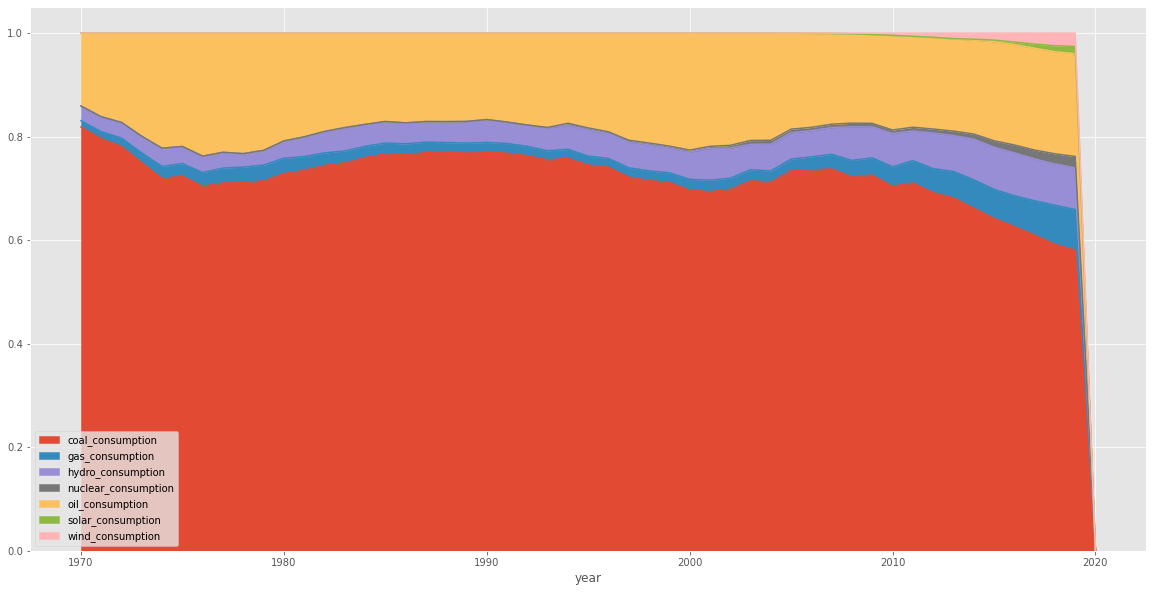

In [17]:
demo.consumption_area_plot('China', True)

Germany: Germany has experienced a drop in coal consumption compared to previous years, but coal and gas consumption still make up for the largest energy sources. Solar and wind have been increasing over the last couple years, but relatively still account for only a marginal part of resources.

Morocco: Morocco has seen a steep increase in total energy consumption since 1970. Relatively speaking fossil fuels (coal and oil) are by far the biggest consumption form. Accounting for approx 90% of the energy consumption.

China: While Chinas consumption has steadily increased since 1970, it has skyrocketed since the year 2000-2001. This goes hand in hand with Chinas plans, to catch up with the rest of the world, which were established around the same time. China is a heavy coal consumer, but there is a pleasant trend visible, where the coal consumption is relatively decreasing since 2010.

In [18]:
#Check GDP evolution for each country you selected. Make a brief analysis for each country.
demo.gdp_over_years(['Germany', 'Morocco', 'China']).head()

country,Germany,Morocco,China
year,,,
1970,1.290000e+12,4.791791e+10,1.060000e+12
1971,1.330000e+12,5.060293e+10,1.140000e+12
1972,1.390000e+12,5.181571e+10,1.130000e+12
1973,1.460000e+12,5.366269e+10,1.210000e+12
1974,1.470000e+12,5.656411e+10,1.240000e+12


When looking at the development of GDP for the three countries selected, it is obvious that China and Morocco have seen a significantly larger percentual increase in GDP than Germany. Whether there is a correlation between that and the carbon tax the EU has put into place or not, cannot be checked using the data at hand. 

<AxesSubplot:xlabel='country'>

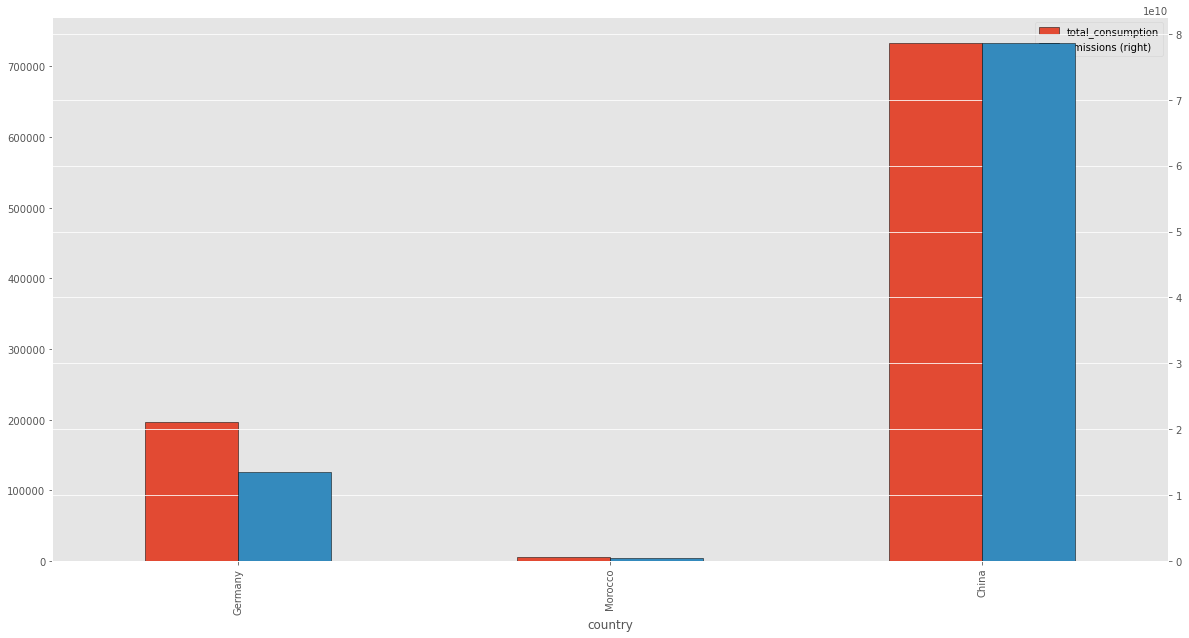

In [19]:
#Check GDP total energy consumption for each country you selected. Make a brief analysis for each country.
demo.consumption_country(['Germany', 'Morocco', 'China'])

Unlike Morocco and China, Germany consumes almost twice as much as it has emissions. That means Germany has imported a lot of energy from other countries.

The consumption for Germany can be forecasted with an ARIMA
of an order of (0, 1, 0)
The emissions for Germany can be forecasted with an ARIMA
of an order of (0, 1, 0)


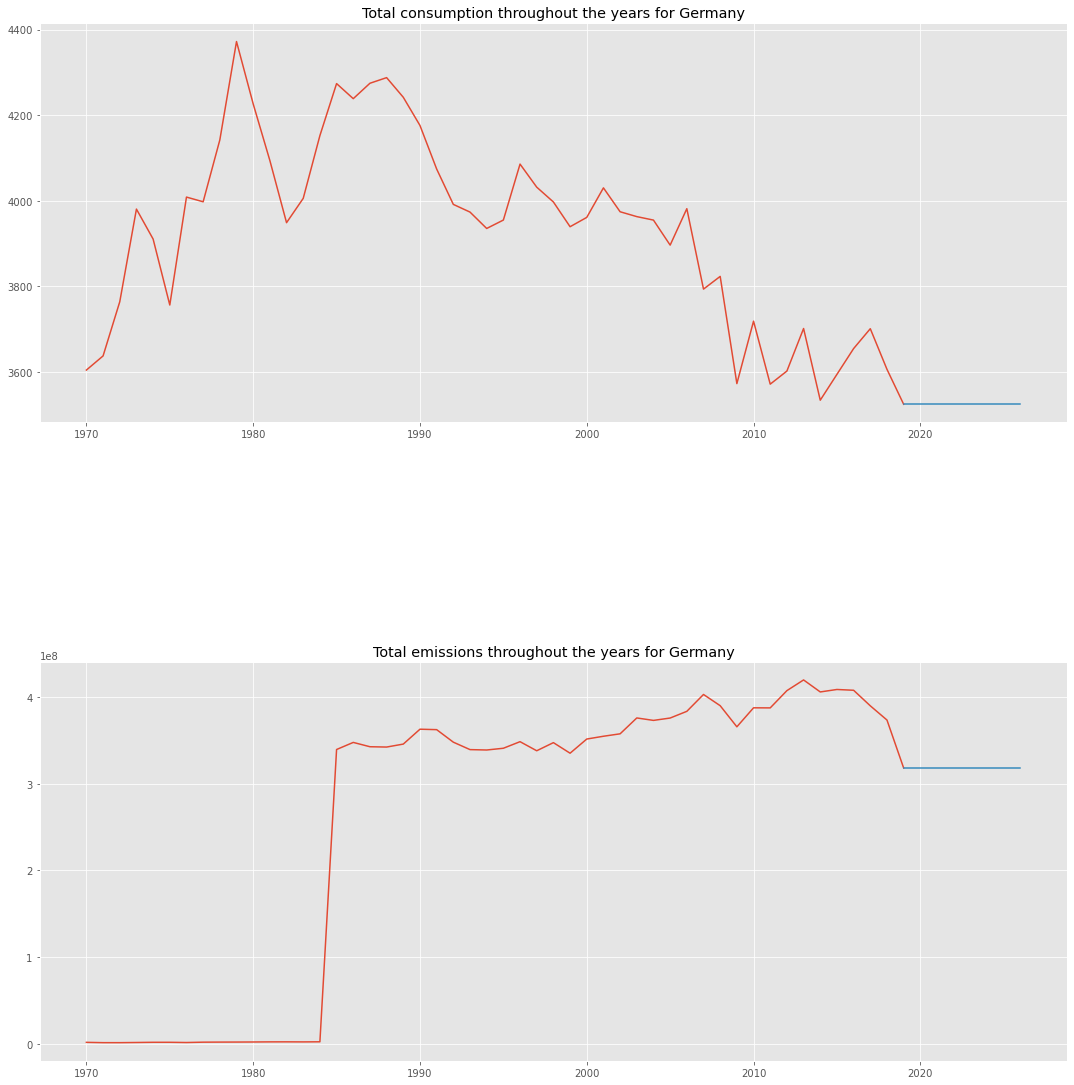

In [9]:
demo.arima_forecast('Germany', 7)

The consumption for Morocco can be forecasted with an ARIMA
of an order of (1, 2, 1)
The emissions for Morocco can be forecasted with an ARIMA
of an order of (0, 1, 0)


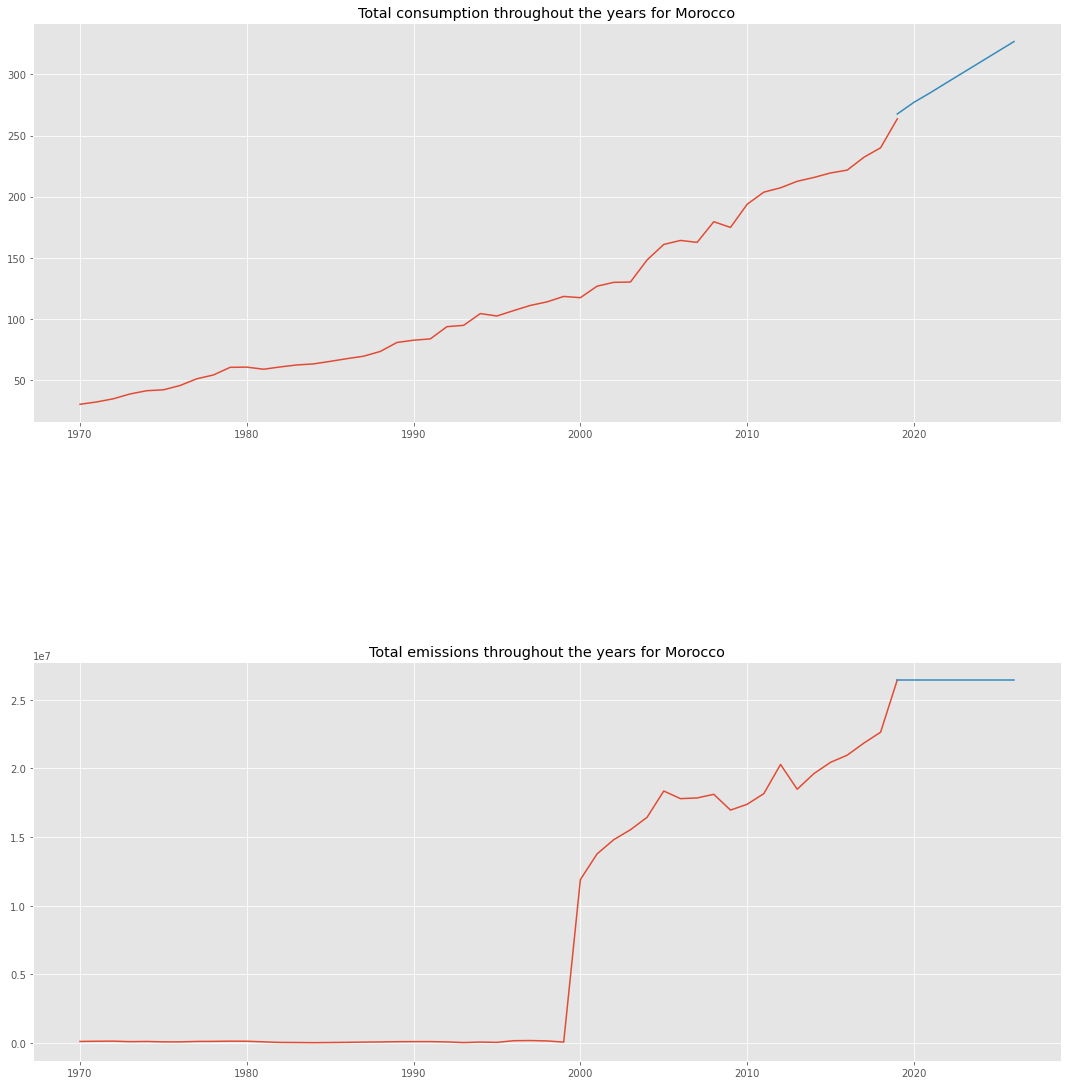

In [10]:
demo.arima_forecast('Morocco', 7)

The consumption for China can be forecasted with an ARIMA
of an order of (0, 2, 5)
The emissions for China can be forecasted with an ARIMA
of an order of (0, 2, 1)


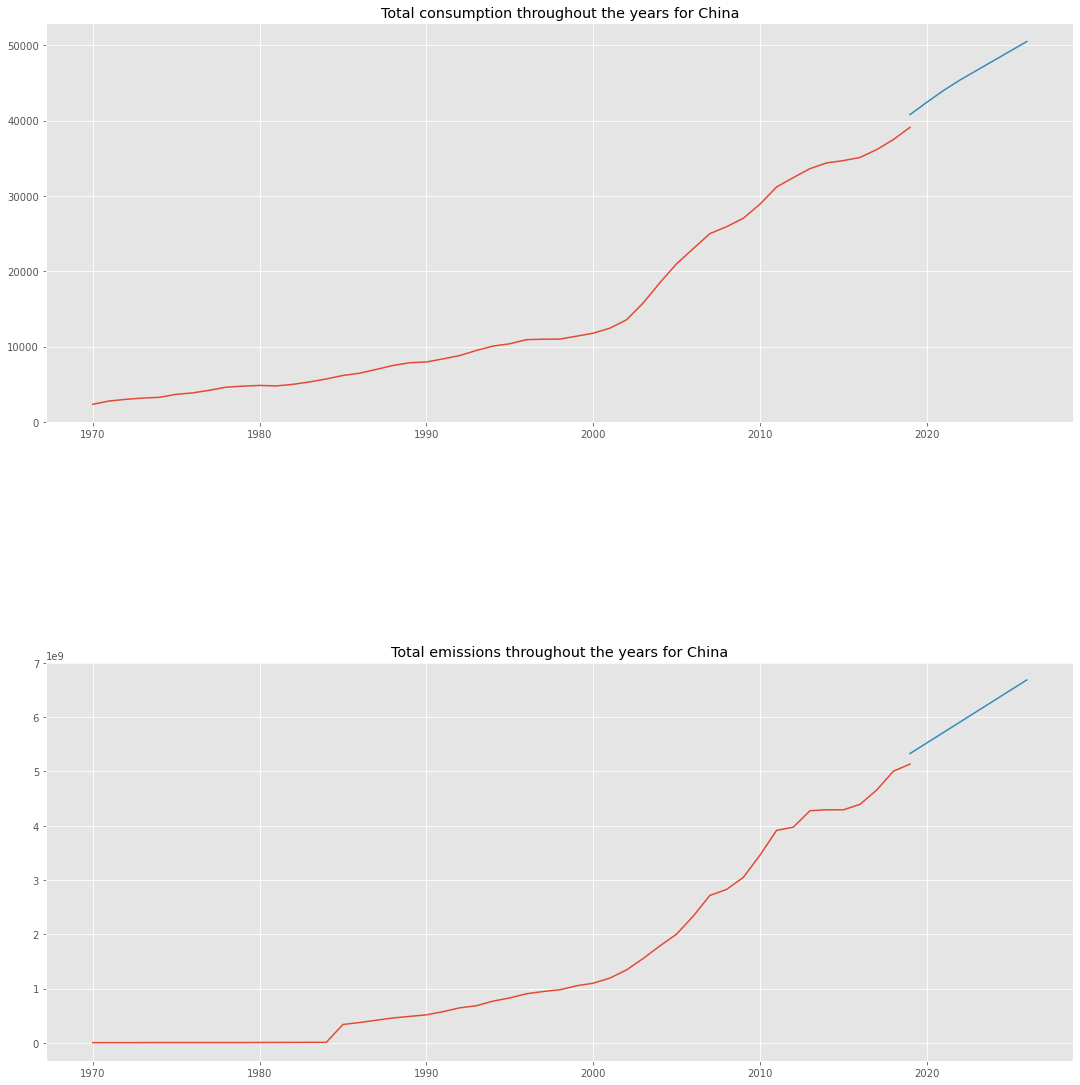

In [11]:
demo.arima_forecast('China', 7)

Lastly we want to see if we can predict how the the emissions and total consumption will develop looking 7 years into the future using an ARIMA model.
For Germany the model predicts the emissions and consumption to stay at the same level it is now.
For Morocco it predicts the consumption to increase while emissions stay the same.
For China it predicts both emissions and consumption to increase.

Looking at the Chinese agenda of becoming the biggest economical force in the world, a continued increase of emissions and consumption makes sense, as energy is necessary for most economical sectors.